In [128]:
from ISLP import load_data
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import pandas as pd
from IPython.display import Markdown
import numpy as np
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

sns.set_theme()

# Problem 1
## Problem 1.a

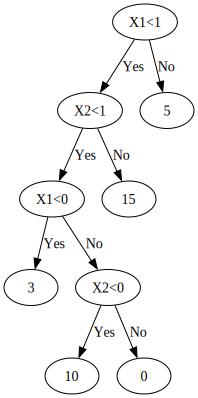

In [2]:
dot = graphviz.Digraph()
dot.edge("X1<1", "X2<1", label="Yes")
dot.edge("X1<1", "5", label="No")
dot.edge("X2<1", "X1<0", label="Yes")
dot.edge("X2<1", "15", label="No")
dot.edge("X1<0", "3", label="Yes")
dot.edge("X1<0", "X2<0", label="No")
dot.edge("X2<0", "10", label="Yes")
dot.edge("X2<0", "0", label="No")
dot

## Problem 1.b

In [3]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 2)
ax.set_ylim(0, 3)
ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")
plt.plot([-1, 2], [1, 1], color="C7")
plt.plot([1, 1], [0, 1], color="C7")
plt.text(0, 0.5, "-1.8", horizontalalignment="center", verticalalignment="center")
plt.text(1.5, 0.5, "0.63", horizontalalignment="center", verticalalignment="center")
plt.plot([-1, 2], [2, 2], color="C7")
plt.text(0.5, 1.5, "2.49", horizontalalignment="center", verticalalignment="center")
plt.plot([0, 0], [2, 3], color="C7")
plt.text(-0.5, 2.5, "-1.06", horizontalalignment="center", verticalalignment="center")
plt.text(1, 2.5, "0.21", horizontalalignment="center", verticalalignment="center")

plt.show()
sns.set_theme()

<Figure size 3000x3000 with 1 Axes>

# Problem 2
## Problem 2.a

In [33]:
Carseats = load_data("Carseats")
Carseats = pd.get_dummies(Carseats)
X_train, X_test, Y_train, Y_test = train_test_split(
    Carseats.drop(["Sales"], axis=1), Carseats["Sales"], random_state=42
)

## Problem 2.b

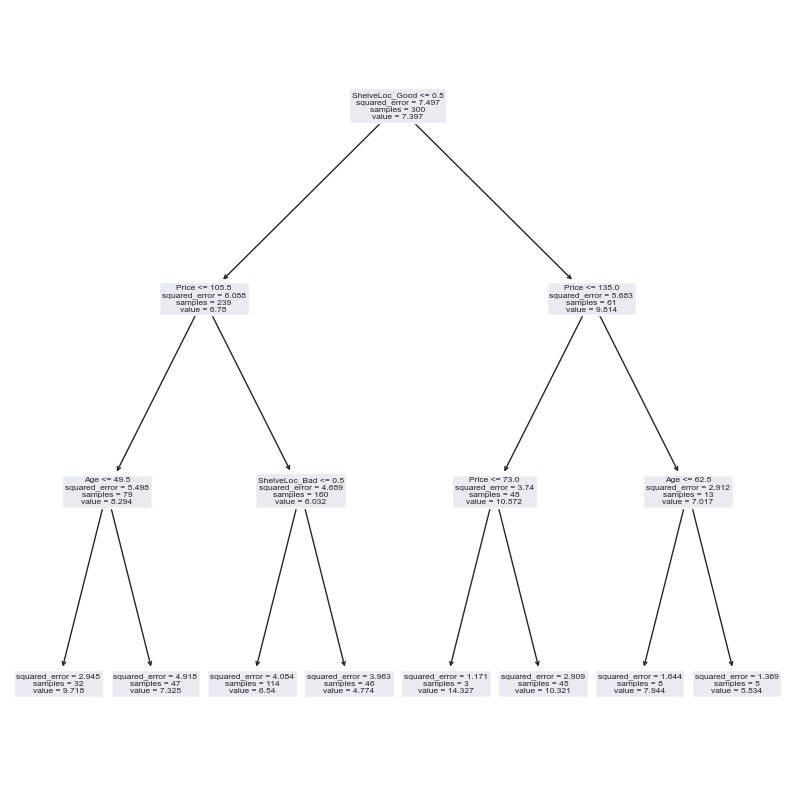

In [78]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train, Y_train)
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train.columns.to_list())
plt.show()

From this tree, we can intpret that ShelveLoc is the most significant cut to determine sales. First it cuts based on whether ShelveLoc is good. Then it cuts based on price. Then finally it considers Price, Age, and ShelveLoc to make the final estimate.

In [72]:
Markdown("Test MSE is " + str(mean_squared_error(tree.predict(X_test), Y_test)))

Test MSE: 5.021884513321162

## Problem 2.c

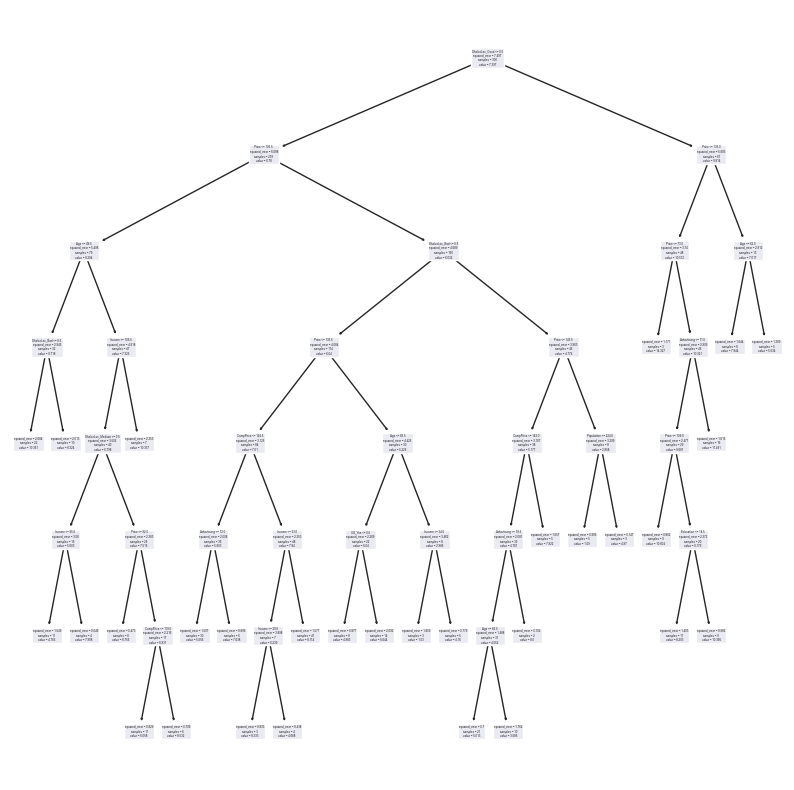

DecisionTreeRegressor(ccp_alpha=0.043897986419752094, max_depth=7,
                      random_state=42)

In [79]:
grid_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    {
        "ccp_alpha": DecisionTreeRegressor(random_state=42)
        .cost_complexity_pruning_path(X_train, Y_train)
        .ccp_alphas,
        "max_depth": np.arange(1, 10),
    },
).fit(X_train, Y_train)
plt.figure(figsize=(10, 10))
plot_tree(grid_tree.best_estimator_, feature_names=X_train.columns.to_list())
plt.show()
grid_tree.best_estimator_

In [ ]:
Markdown(
    "The test MSE is " + str(mean_squared_error(grid_tree.predict(X_test), Y_test))
)

Yes, using CV to test pruning and max depths does improve testing score.
## Problem 2.d

In [126]:
bag = BaggingRegressor().fit(X_train, Y_train)
Markdown("The test MSE is " + str(mean_squared_error(bag.predict(X_test), Y_test)))

The test MSE is 2.9664181800000007

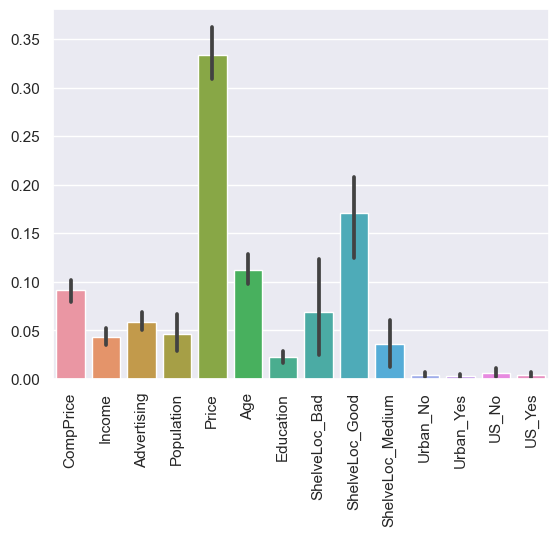

In [125]:
sns.barplot(data=pd.concat([pd.DataFrame([tree.feature_importances_],columns=X_train.columns) for tree in bag.estimators_]))
plt.xticks(rotation=90)
plt.show()


We can see that Price is by far most important, shortly followed by ShevleLoc_Good and Age.
## Problem 2.e

In [129]:
forest = RandomForestRegressor().fit(X_train, Y_train)
Markdown("The test MSE is " + str(mean_squared_error(forest.predict(X_test), Y_test)))

The test MSE is 2.809237223199999